In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"
pp_df = pd.read_parquet('../RESULTADOS/DADOS/CSVs/dados processados/pp_lula_by_municipio.parquet')
pp_df.head()

,SG_UF,NM_MUNICIPIO,CD_MUNICIPIO,QT_VOTOS,PP_LULA,pib,IDEB 2005,IDEB 2015
0,RO,GUAJARÁ-MIRIM,19,19839,0.344675,984 586,3.2,3.6
1,RO,NOVA MAMORÉ,434,13123,0.220757,601 910,3.2,3.6
2,RO,PORTO VELHO,35,261935,0.353660,19 448 762,3.2,3.6
3,RO,ITAPUÃ DO OESTE,493,4378,0.375057,192 783,3.2,3.6
4,RO,JI-PARANÁ,51,68126,0.245295,4 057 626,3.2,3.6


<AxesSubplot: xlabel='pib per voto', ylabel='PP_LULA'>

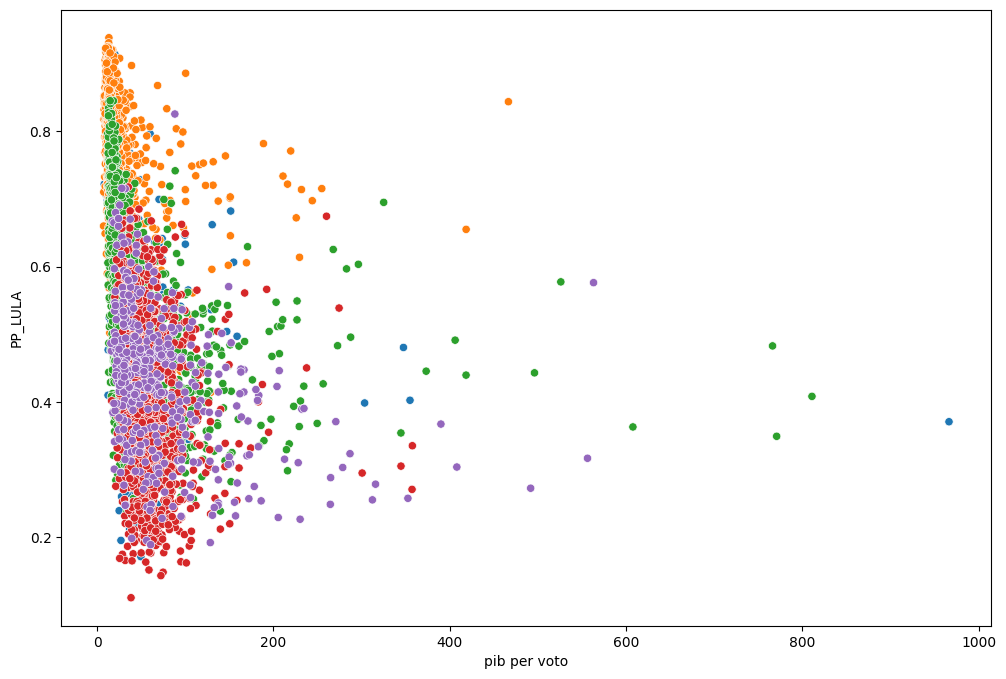

In [12]:
plt.figure(figsize=(12,8))
regioes = pd.read_parquet('../RESULTADOS/DADOS/CSVs/dados processados/regioes.parquet')
joined_df = pd.merge(pp_df, regioes, on='SG_UF', how='left')
from helpers import string_code_to_int
joined_df['pib'] = joined_df['pib'].apply(lambda x: string_code_to_int(x))
joined_df['pib per voto'] = joined_df['pib']/joined_df['QT_VOTOS']
sns.scatterplot(x='pib per voto',y='PP_LULA',data=joined_df, hue='REGIAO',legend=False)

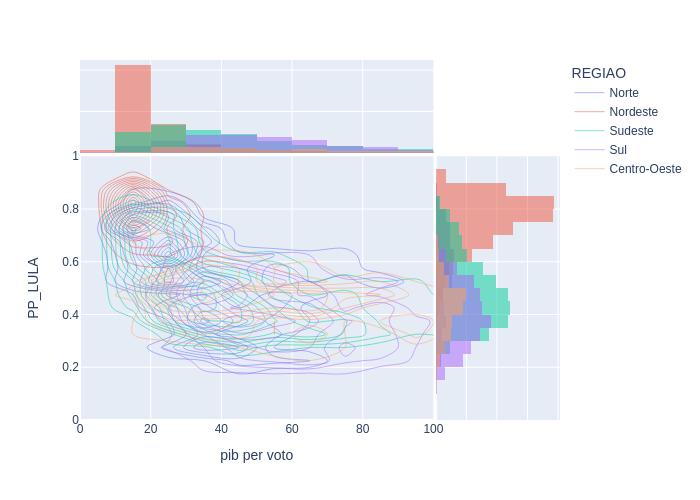

In [13]:
fig = px.density_contour(joined_df, x='pib per voto', y='PP_LULA', color='REGIAO',range_x=[0,100] ,range_y=[0,1],marginal_x="histogram",marginal_y='histogram')
fig.write_image('imagem.png')
Image.open('imagem.png')

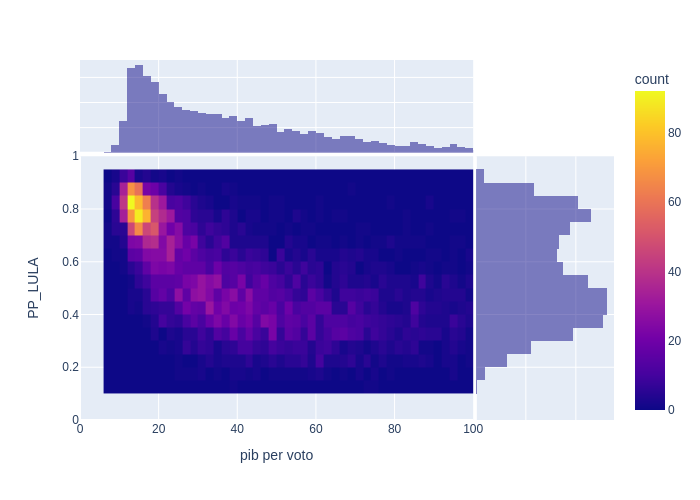

In [19]:
fig = px.density_heatmap(joined_df, x='pib per voto', y='PP_LULA',range_x=[0,100],nbinsx=500,nbinsy=25 ,range_y=[0,1],marginal_x="histogram", marginal_y="histogram")
fig.write_image('imagem.png')
Image.open('imagem.png')

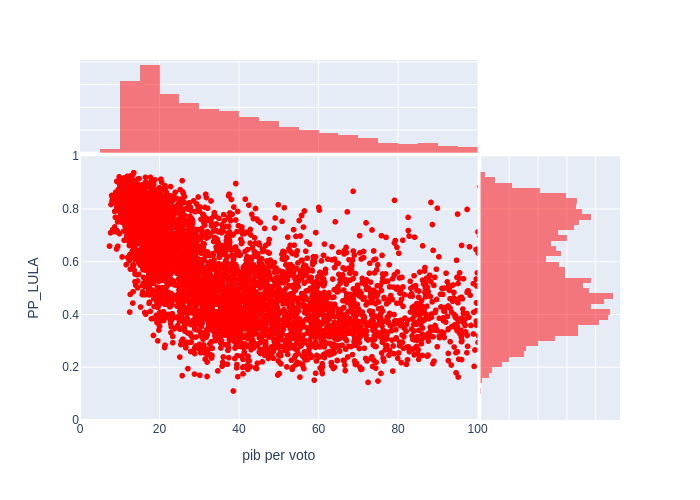

In [15]:
fig = px.scatter(joined_df, x='pib per voto',y='PP_LULA', hover_data=['SG_UF','NM_MUNICIPIO'],color_discrete_sequence=['red'],range_x=[0, 100],range_y=[0, 1],marginal_x="histogram",marginal_y="histogram")
fig.write_image('imagem.png')
Image.open('imagem.png')

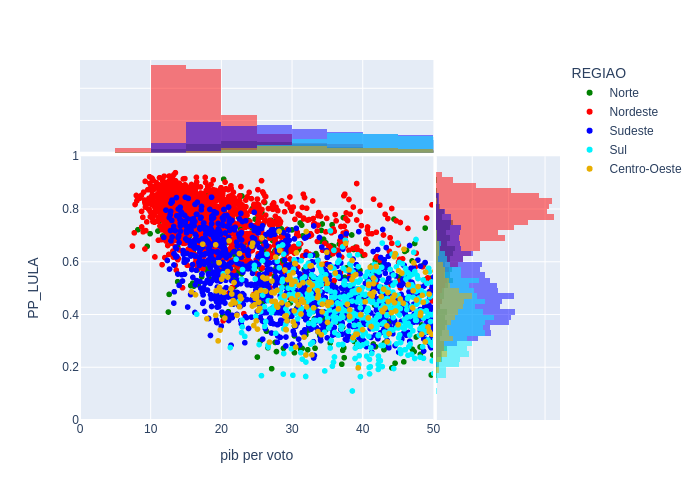

In [16]:
fig = px.scatter(joined_df, x='pib per voto',y='PP_LULA', color="REGIAO", hover_data=['SG_UF','NM_MUNICIPIO'],color_discrete_sequence=['green','red','blue','#00f2ff','#e8ae00'],range_x=[0, 50],range_y=[0, 1],marginal_x="histogram",marginal_y="histogram")
from PIL import Image

fig.write_image('imagem.png')
Image.open('imagem.png')

In [17]:
from mapCreation import generate_map
vmax = max(pp_df['IDEB 2005'].max(),pp_df['IDEB 2015'].max())
vmin = min(pp_df['IDEB 2005'].min(),pp_df['IDEB 2015'].min())

In [ ]:
ideb_2015_map = generate_map(pp_df,'IDEB 2005',colors=['white','blue','red'],vmin=vmin,vmax=vmax)
ideb_2005_map = generate_map(pp_df,'IDEB 2015',colors=['white','blue','red'],vmin=vmin,vmax=vmax)

In [ ]:
pp_df['diff ideb'] = pp_df['IDEB 2015'] - pp_df['IDEB 2005']
diff_ideb_map = generate_map(pp_df,'diff ideb',colors=['white','blue','red'])

<built-in function min> <built-in function max>


In [ ]:
diff_ideb_map.save('../RESULTADOS/DADOS/MAPAS HTML/diff_ideb.html')
ideb_2015_map.save('../RESULTADOS/DADOS/MAPAS HTML/ideb_2015.html')
ideb_2005_map.save('../RESULTADOS/DADOS/MAPAS HTML/ideb_2005.html')